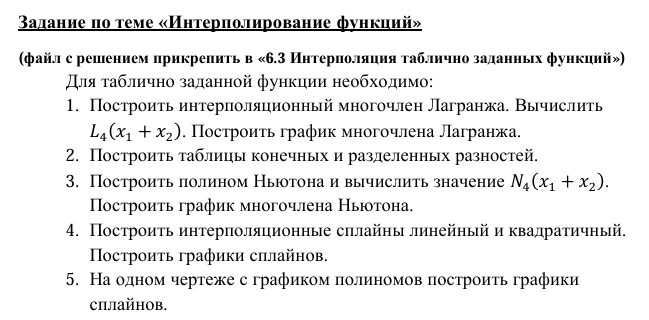

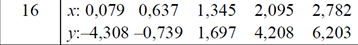

Найдем интерполяционный линейный сплайн (y=ax+b):

In [3]:
x = [0.079, 0.637, 1.345, 2.095, 2.782]
y = [-4.308, -0.739, 1.697, 4.208, 6.203]

# Строим линейный сплайн
for i in range(len(x) - 1):
    x1, x2 = x[i], x[i+1]
    y1, y2 = y[i], y[i+1]

    # Находим коэффициенты
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1

    sign = '+' if b >= 0 else '-'
    print(f"На отрезке [{x1:.3f}; {x2:.3f}]:  y = {a:.3f}x {sign} {abs(b):.3f}")

На отрезке [0.079; 0.637]:  y = 6.396x - 4.813
На отрезке [0.637; 1.345]:  y = 3.441x - 2.931
На отрезке [1.345; 2.095]:  y = 3.348x - 2.806
На отрезке [2.095; 2.782]:  y = 2.904x - 1.876


Запишем все полученные функции и построим графики:

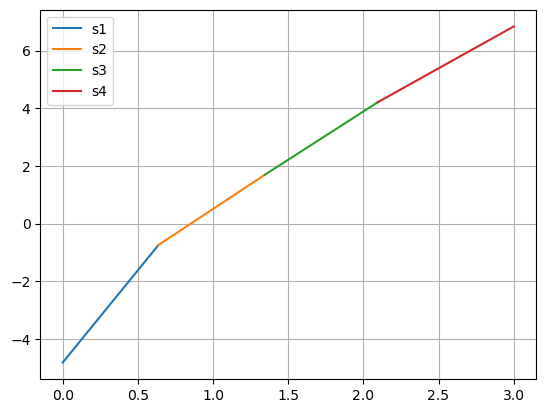

In [10]:
import matplotlib.pyplot as plt
import numpy as np

s1 = lambda x: 6.396 * x - 4.813
s2 = lambda x: 3.441 * x - 2.931
s3 = lambda x: 3.348 * x - 2.806
s4 = lambda x: 2.904 * x - 1.876

# ==== Строим графики линейного интерполяционного сплайна ====
array_x1 = np.linspace(0, 0.637, 1000)
array_x2 = np.linspace(0.637, 1.345, 1000)
array_x3 = np.linspace(1.345, 2.095, 1000)
array_x4 = np.linspace(2.095, 3, 1000)

y1 = [s1(x_i) for x_i in array_x1]
y2 = [s2(x_i) for x_i in array_x2]
y3 = [s3(x_i) for x_i in array_x3]
y4 = [s4(x_i) for x_i in array_x4]

plt.plot(array_x1, y1, label="s1")
plt.plot(array_x2, y2, label="s2")
plt.plot(array_x3, y3, label="s3")
plt.plot(array_x4, y4, label="s4")
plt.legend()
plt.grid(True)
plt.show()

Найдем интерполяционный квадратичный сплайн (y=ax^2+bx+c):

In [11]:
import numpy as np

x = [0.079, 0.637, 1.345, 2.095, 2.782]
y = [-4.308, -0.739, 1.697, 4.208, 6.203]

# ==== ПЕРВАЯ ПАРАБОЛА (по первым трём точкам) ====
xs1 = np.array(x[:3], float)
ys1 = np.array(y[:3], float)

A1 = np.column_stack([xs1 ** 2, xs1, np.ones_like(xs1)])
a1, b1, c1 = np.linalg.solve(A1, ys1)

# ==== ВТОРАЯ ПАРАБОЛА (по последним трём точкам) ====
xs2 = np.array(x[2:], float)
ys2 = np.array(y[2:], float)

A2 = np.column_stack([xs2 ** 2, xs2, np.ones_like(xs2)])
a2, b2, c2 = np.linalg.solve(A2, ys2)

def print_eq(a, b, c, x1, x2):
    sb = '+' if b >= 0 else '-'
    sc = '+' if c >= 0 else '-'
    print(f"На отрезке [{x1:.3f}; {x2:.3f}]:  y = {a:.3f}x^2 {sb} {abs(b):.3f}x {sc} {abs(c):.3f}")

print_eq(a1, b1, c1, x[0], x[2])
print_eq(a2, b2, c2, x[2], x[4])

На отрезке [0.079; 1.345]:  y = -2.334x^2 + 8.068x - 4.931
На отрезке [1.345; 2.782]:  y = -0.309x^2 + 4.411x - 3.677


Запишем все полученные функции и построим графики:

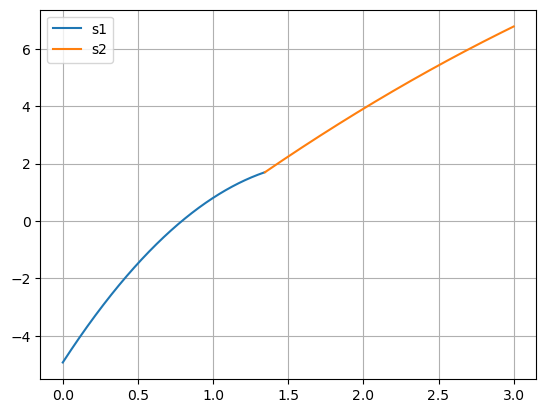

In [12]:
import matplotlib.pyplot as plt
import numpy as np

s1 = lambda x: -2.334 * x ** 2 + 8.068 * x - 4.931
s2 = lambda x: -0.309 * x ** 2 + 4.411 * x - 3.677

# ==== Строим графики линейного интерполяционного сплайна ====
array_x1 = np.linspace(0, 1.345, 1000)
array_x2 = np.linspace(1.345, 3, 1000)

y1 = [s1(x_i) for x_i in array_x1]
y2 = [s2(x_i) for x_i in array_x2]

plt.plot(array_x1, y1, label="s1")
plt.plot(array_x2, y2, label="s2")
plt.legend()
plt.grid(True)
plt.show()